# **Demo de uso de ImageAI para reconocer el tipo de objeto en una imagen**

Basado en info de [https://imageai.readthedocs.io/en/latest/prediction/index.html]


0) Preparar el ambiente para usar el paquete ImageAI:



In [0]:
pip install imageAI

     |████████████████████████████████| 184kB 9.1MB/s 


1) Cargar Librerías: 

In [0]:
# nota se debe indicar la versión 1 de TF para compatibilidad del código
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

from imageai.Prediction import ImagePrediction
import os
from IPython.display import Image, display

print("Librerías cargadas")

Librerías cargadas


2) Montar el Drive:

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

# directorio local en Google Drive
path = 'gdrive/My Drive/IA/demoImageAI' 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


3) Seleccionar modelo a cargar y utilizar:

*Nota: ejecutar sólo uno de los siguientes.*

*Nota 2: ya están bajados enla  subcarpeta "models".*

- SqueezeNet

In [0]:
multiple_prediction = ImagePrediction()
multiple_prediction.setModelTypeAsSqueezeNet()
multiple_prediction.setModelPath("".join((path,"/models/squeezenet_weights_tf_dim_ordering_tf_kernels.h5")))
multiple_prediction.loadModel()
model = "SqueezeNet"
print("Modelo ", model, " cargado")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Modelo  SqueezeNet  cargado


- ResNet

In [0]:
multiple_prediction = ImagePrediction()
multiple_prediction.setModelTypeAsResNet()
multiple_prediction.setModelPath("".join((path,"/models/resnet50_weights_tf_dim_ordering_tf_kernels.h5")))
multiple_prediction.loadModel()
model = "ResNet"
print("Modelo ", model, " cargado")

- Inception v3

In [0]:
multiple_prediction = ImagePrediction()
multiple_prediction.setModelTypeAsInceptionV3()
multiple_prediction.setModelPath("".join((path,"/models/inception_v3_weights_tf_dim_ordering_tf_kernels.h5")))
multiple_prediction.loadModel()
model = "Inception v3"
print("Modelo ", model, " cargado")

- DenseNet

In [0]:
multiple_prediction = ImagePrediction()
multiple_prediction.setModelTypeAsDenseNet()
multiple_prediction.setModelPath("".join((path,"/models/DenseNet-BC-121-32.h5")))
multiple_prediction.loadModel()
model = "DenseNet"
print("Modelo ", model, " cargado")

4) Cargar las imágenes a procesar de la subcarpeta "test":

In [0]:
# levanta imágenes 
all_images_array = []
auxiPath = path + "/test"
all_files = os.listdir(auxiPath)
for each_file in all_files:
    if(each_file.endswith(".jpg") or each_file.endswith(".png")):
        all_images_array.append(auxiPath + "/" + each_file)

print(len(all_images_array), " imágenes cargadas.")

6  imágenes cargadas.


5) Ejecutar el modelo cargado sobre las imágenes cargadas: 

In [0]:
# ejecuta el modelo seleccionado sobre las imaágenes cargadas
# devuelve un vector con los 5 mejores resultados para cada una
results_array = multiple_prediction.predictMultipleImages(all_images_array, result_count_per_image=5)

print("Imágenes procesadas con el modelo ", model)

Imágenes procesadas con el modelo  SqueezeNet


6) Mostrar los resultados de cada imagen.

> Modelo  SqueezeNet :
-----------------------------------------------------------------------------
*  gdrive/My Drive/IA/demoImageAI/test/banana.jpg


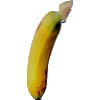

      slug  :  19.985871016979218
      banana  :  17.521287500858307
      ear  :  15.238794684410095
      zucchini  :  8.343229442834854
      quill  :  3.6070365458726883
-----------------------------------------------------------------------------
*  gdrive/My Drive/IA/demoImageAI/test/auto.jpg


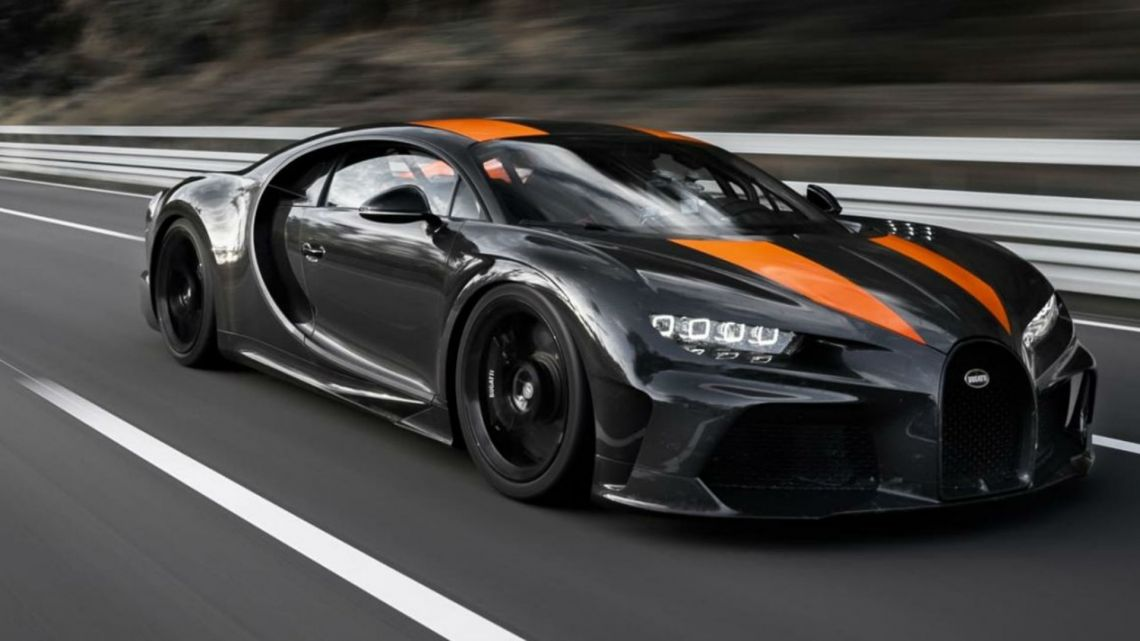

      sports_car  :  83.20476412773132
      crash_helmet  :  8.1650510430336
      racer  :  8.161594718694687
      grille  :  0.14395707985386252
      convertible  :  0.12861767318099737
-----------------------------------------------------------------------------
*  gdrive/My Drive/IA/demoImageAI/test/perro.jpg


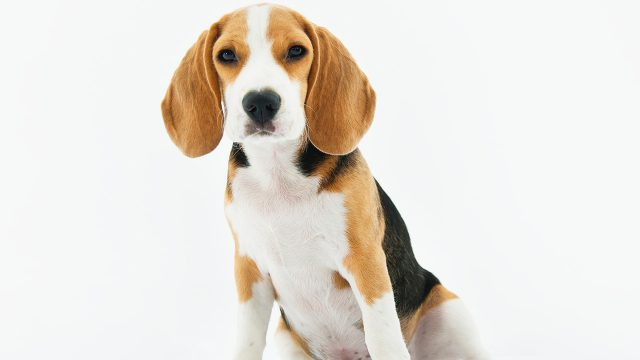

      English_foxhound  :  49.05001521110535
      Walker_hound  :  25.765439867973328
      beagle  :  24.184732139110565
      basset  :  0.4906269256025553
      Welsh_springer_spaniel  :  0.387784861959517
-----------------------------------------------------------------------------
*  gdrive/My Drive/IA/demoImageAI/test/gato.jpg


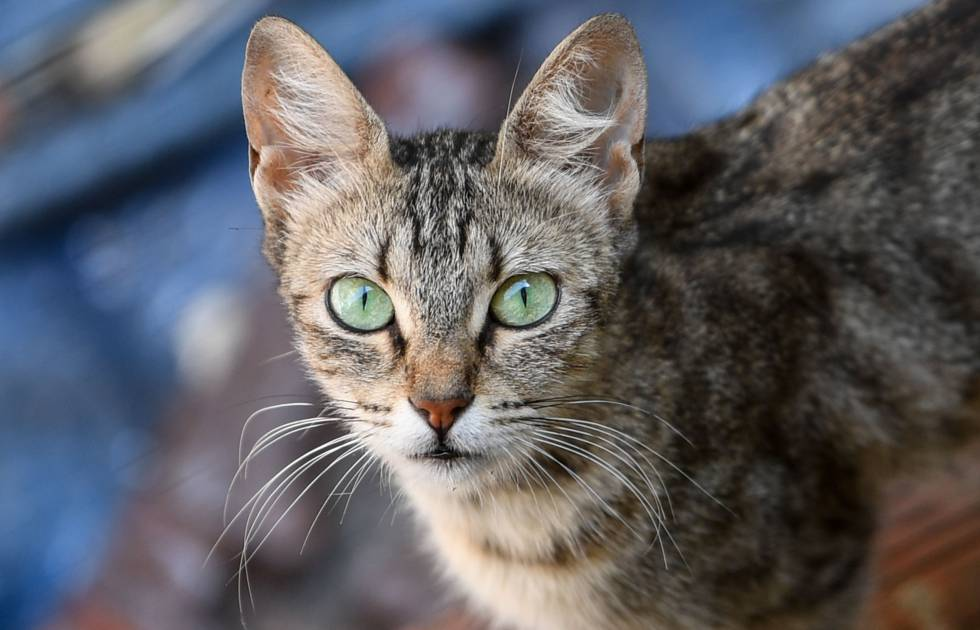

      tabby  :  79.33671474456787
      tiger_cat  :  15.115129947662354
      Egyptian_cat  :  4.72731776535511
      lynx  :  0.6168428342789412
      wood_rabbit  :  0.09505784837529063
-----------------------------------------------------------------------------
*  gdrive/My Drive/IA/demoImageAI/test/flor.jpg


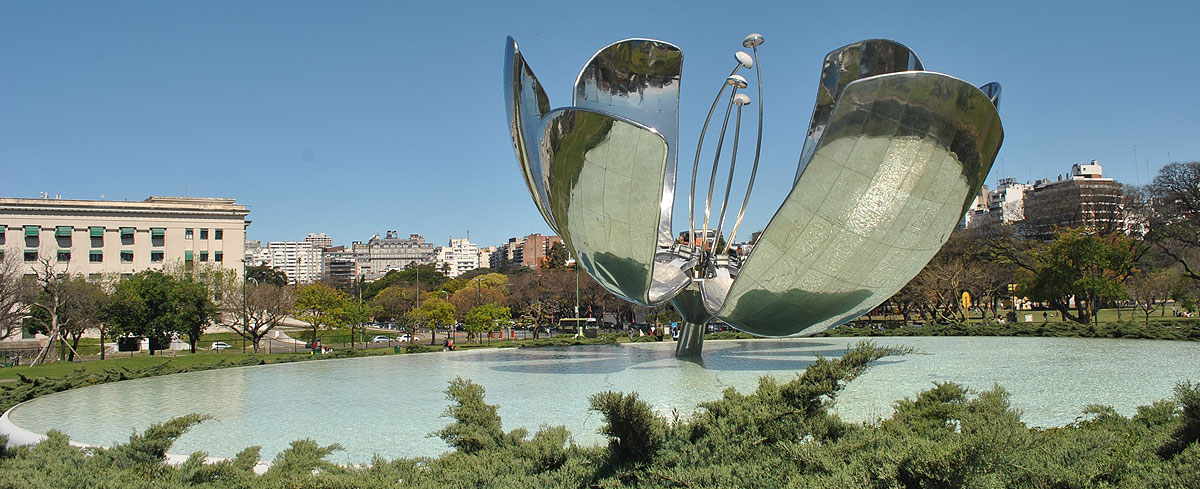

      fountain  :  60.94972491264343
      castle  :  12.744700908660889
      megalith  :  11.78152710199356
      picket_fence  :  1.7918579280376434
      stone_wall  :  0.988492090255022
-----------------------------------------------------------------------------
*  gdrive/My Drive/IA/demoImageAI/test/empanadas.jpg


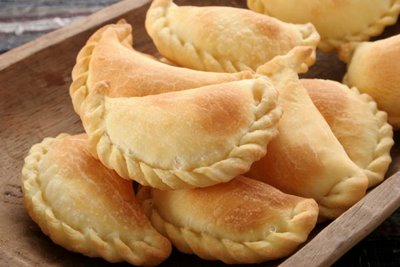

      bagel  :  43.99107098579407
      potpie  :  20.9510400891304
      dough  :  16.289445757865906
      French_loaf  :  14.783470332622528
      burrito  :  2.8507502749562263
-----------------------------------------------------------------------------


In [0]:
# muestra los resultados
print("> Modelo ", model, ":")
for (each_image, each_result) in zip(all_images_array, results_array):
    print("-----------------------------------------------------------------------------")
    print("* ", each_image)
    display(Image(each_image, width=300, height=200))
    predictions, percentage_probabilities = each_result["predictions"], each_result["percentage_probabilities"]
    for index in range(len(predictions)):
        print("     ", predictions[index] , " : " , percentage_probabilities[index], "%")
print("-----------------------------------------------------------------------------")